<a href="https://colab.research.google.com/github/Swayam248/Lumpy-Cow-Prediction/blob/main/Lumpy_cow_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
import os

# Mounting Google Drive to Colab env
drive.mount("/content/drive", force_remount=True)

# Defining the dataset directory path
dataset_dir = '/content/drive/MyDrive/cowlump/Dataset'

# Defining paths to individual folders
train_healthycows = os.path.join(dataset_dir, 'train_healthycows')
train_lumpycows = os.path.join(dataset_dir, 'train_lumpycows')
test_healthycows = os.path.join(dataset_dir, 'test_healthycows')
test_lumpycows = os.path.join(dataset_dir, 'test_lumpycows')

# Check folder contents to confirm paths
print("Training Healthy Cows dataset contains: ", len(os.listdir(train_healthycows)), "data")
print("Training Lumpy Cows dataset contains: ", len(os.listdir(train_lumpycows)), "data")
print("Testing Healthy Cows dataset contains: ", len(os.listdir(test_healthycows)), "data")
print("Testing Lumpy Cows dataset contains: ", len(os.listdir(test_lumpycows)), "data")


Mounted at /content/drive
Training Healthy Cows dataset contains:  412 data
Training Lumpy Cows dataset contains:  337 data
Testing Healthy Cows dataset contains:  103 data
Testing Lumpy Cows dataset contains:  84 data


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''
A Keras utility to preprocess and augment image data. Helps to apply transformations like resizing,
rescaling, rotation, etc., and generate batches of data for training or testing.
'''

# Data preprocessing for training data
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Data preprocessing for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data from directories
train_data = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),  # Resizing images to 128x128 pixels as NN require inputs of fixed sizze.
    batch_size=32,            # defining the batch size(no. of images to be trained in each batch)
    class_mode='binary',      # Binary classification: Healthy cows vs Lumpy cows
    subset='training',        # Use this for training data
    shuffle=True              # Shuffling images for better training to avoid any pattern
)

# Load testing data from directories
test_data = test_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',      # Binary classification: Healthy cows vs Lumpy cows
    subset='validation',      # Use this for validation/testing data
    shuffle=False             # No shuffling for test set
)


Found 938 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

'''
Sequential: A Keras API for building the models layer by layer, where each layer has exactly one input and one output.
Conv2D: A convolutional layer used for feature extraction from images.
MaxPooling2D: Reduces the spatial dimensions (height and width) of the feature maps, retaining only the most important information.
Flatten: Converts the 2D feature maps into a 1D vector for the fully connected layers.
Dense: A fully connected layer where each input is connected to every output.
Dropout: A regularization technique to reduce overfitting by randomly setting a fraction of inputs to zero during training.
'''
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    #relu Applies the ReLU activation function,  which introduces non-linearity and removes negative values.'''
    #32 is no. of filters and 3,3 is size of each filter
    #input_shape=(128, 128, 3): Specifies the input image dimensions (128x128 pixels, 3 color channels for RGB).
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    #Increases the depth of the model to learn more complex features.
    #64 and 128: The number of filters increases with depth, allowing the model to learn more detailed features.
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'), #fully connected layer with 128 neurons and ReLU activation.
    Dropout(0.5),  # Dropout layer to prevent overfitting, Randomly drops 50% of the neurons during training
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification, Outputs a value between 0 and 1
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
'''
Adam is a popular optimizer that adapts the learning rate during training for efficient convergence.
binary_crossentropy is used for binary classification tasks. Measures the difference between the predicted and actual class probabilities.
Tracks the accuracy during training and validation.
'''
# Display model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

In [13]:
# Print the number of files in each folder
print(f"Training Healthy Cows: {len(os.listdir(train_healthycows))}")
print(f"Training Lumpy Cows: {len(os.listdir(train_lumpycows))}")
print(f"Testing Healthy Cows: {len(os.listdir(test_healthycows))}")
print(f"Testing Lumpy Cows: {len(os.listdir(test_lumpycows))}")


Training Healthy Cows: 412
Training Lumpy Cows: 337
Testing Healthy Cows: 103
Testing Lumpy Cows: 84


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,      # Normalize pixel values to [0, 1]
    shear_range=0.2,      # Shear transformation  (slanting the image) within a range of 20%.
    zoom_range=0.2,       # Random zoom in or out on images by up to 20%.
    horizontal_flip=True  # Random horizontal flipping to simulate different perspectives.
)

# Data preprocessing for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data from its respective directories
train_data = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/cowlump/Dataset',  # Root directory containing subfolders
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='binary',     # Binary classification: Healthy vs Lumpy cows
    classes=['train_healthycows', 'train_lumpycows'],  # Explicit class names
    shuffle=True
)

# Load testing data from the specific subfolders
test_data = test_datagen.flow_from_directory(
    #The flow_from_directory method generates batches of images and corresponding labels from the subfolder structure.
    #Each class (subfolder) is assigned a label based on the order in the classes list:
    #train_healthycows → Label 0
    #train_lumpycows → Label 1
    directory='/content/drive/MyDrive/cowlump/Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',      # Binary classification: Healthy vs Lumpy cows
    classes=['test_healthycows', 'test_lumpycows'],  # Explicit class names
    shuffle=False
)


Found 749 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [15]:
#showing the correspond labels
print(train_data.class_indices)
print(test_data.class_indices)

{'train_healthycows': 0, 'train_lumpycows': 1}
{'test_healthycows': 0, 'test_lumpycows': 1}


In [16]:
from tensorflow.keras import layers, models
#displaying the summary of a Convolutional Neural Network (CNN) model
# Build the CNN model
model = models.Sequential()
#models.Sequential: Simplifies model creation by stacking layers in a linear order.

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
'''MaxPooling2D((2, 2)) reduces the spatial dimensions of the feature map by taking the maximum value in a 2x2 window.
This helps in dimensionality reduction and retaining the most important features.
'''

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers to feed into a fully connected layer
model.add(layers.Flatten())
#Converts the 3D feature maps into a 1D vector so that it can be fed into fully connected (dense) layers.

# Dense layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))
#A fully connected layer with 128 units.
#ReLU Activation allows the network to capture non-linear relationships.

# Output layer with 1 unit for binary classification
model.add(layers.Dense(1, activation='sigmoid'))
# Output layer with 1 unit for binary classification (e.g., healthy vs. lumpy cows).
# Sigmoid Activation outputs a probability between 0 and 1.

# Model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 128)      

In [17]:
# Compile the model
#compile() method configures the model's learning process.
model.compile(optimizer='adam',   # Adam optimizer
              loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])  # Track accuracy during training


In [18]:
# Train the model
#fit() function trains the model using the training dataset and evaluates it on the validation dataset after each epoch.
history = model.fit(
    train_data,    # Training data
    epochs=10,     # Number of epochs to train, epoch is one complete pass through the entire training dataset.
    #too less epochs leads underfitting and vice versa leads overfitting.
    validation_data=test_data  # Validation data
)


Epoch 1/10
24/24 [==============================] - 172s 7s/step - loss: 0.7411 - accuracy: 0.5808 - val_loss: 0.5958 - val_accuracy: 0.6898
Epoch 2/10
24/24 [==============================] - 21s 874ms/step - loss: 0.6121 - accuracy: 0.6836 - val_loss: 0.5000 - val_accuracy: 0.7861
Epoch 3/10
24/24 [==============================] - 21s 878ms/step - loss: 0.6205 - accuracy: 0.6689 - val_loss: 0.4826 - val_accuracy: 0.8182
Epoch 4/10
24/24 [==============================] - 21s 865ms/step - loss: 0.5564 - accuracy: 0.7156 - val_loss: 0.4158 - val_accuracy: 0.8075
Epoch 5/10
24/24 [==============================] - 21s 869ms/step - loss: 0.5212 - accuracy: 0.7276 - val_loss: 0.4967 - val_accuracy: 0.7647
Epoch 6/10
24/24 [==============================] - 21s 874ms/step - loss: 0.5225 - accuracy: 0.7450 - val_loss: 0.4161 - val_accuracy: 0.8289
Epoch 7/10
24/24 [==============================] - 21s 874ms/step - loss: 0.5056 - accuracy: 0.7637 - val_loss: 0.4116 - val_accuracy: 0.8075
E

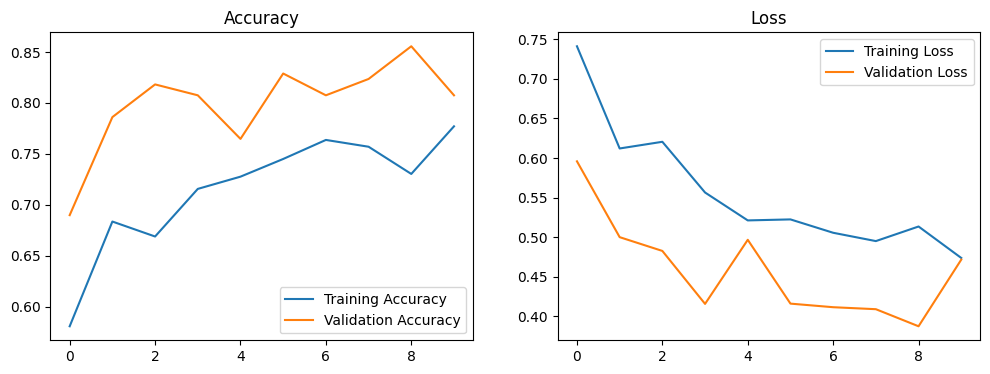

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
# plt.subplot(1, 2, 1): Creates a subplot with 1 row and 2 columns. This specifies that you want to plot the first graph on the left side.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [20]:
from tensorflow.keras.preprocessing import image
#image: This module from tensorflow.keras.preprocessing is used to load and preprocess images before passing them to the model for prediction.
import numpy as np

# Load and preprocess a random image from the test set
img_path = "/content/drive/MyDrive/cowlump/Dataset/Data_for_testing_random_images/lumpy_cow.jpg"  # Path in drive which contains the dataset for testing
img = image.load_img(img_path, target_size=(128, 128))  # Resize the image to match the input size of the model (128x128 size is normalised)
img_array = image.img_to_array(img)  # Convert image to array
'''img_to_array(): Converts the loaded image (which is in the form of a PIL image) into a NumPy array.
This is necessary because Keras models expect the input data in array form.'''
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
'''
np.expand_dims(): Adds an additional dimension to the image array. The model expects input in batches (even if you're testing on one image).
 So, this converts the shape of the image from (128, 128, 3) to (1, 128, 128, 3) to represent a batch size of 1.
'''
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Predict using the trained model
prediction = model.predict(img_array)

# Display the result
if prediction < 0.5:
    print("The cow is Healthy.")
else:
    print("The cow is Lumpy.")


1/1 [==============================] - 0s 100ms/step
The cow is Healthy.


In [28]:
model.save('/content/cow_health_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
